In [1]:
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

In [3]:
dataset = "images"
modelname = "type_your_model_name_here"
plot = "type_your_plot_name_here.png"

In [4]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32

In [5]:
data = []
labels = []
labels_name = ["not_santa","pepe","santa"]

In [6]:
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)
print(imagePaths)

['images/not_santa/00000028.jpg', 'images/not_santa/00000456.jpg', 'images/santa/00000065.jpg', 'images/santa/00000237.jpg', 'images/santa/00000400.jpg', 'images/santa/00000389.jpg', 'images/not_santa/00000345.jpg', 'images/not_santa/00000241.jpg', 'images/not_santa/00000221.jpg', 'images/santa/00000130.jpg', 'images/santa/00000116.jpg', 'images/santa/00000307.jpg', 'images/not_santa/00000354.jpg', 'images/not_santa/00000287.jpg', 'images/santa/00000162.jpg', 'images/santa/00000267.jpg', 'images/not_santa/00000350.jpg', 'images/not_santa/00000049.jpg', 'images/santa/00000407.jpg', 'images/santa/00000120.jpg', 'images/not_santa/00000036.jpg', 'images/santa/00000054.jpg', 'images/santa/00000072.jpg', 'images/santa/00000397.jpg', 'images/santa/00000051.jpg', 'images/not_santa/00000110.jpg', 'images/santa/00000258.jpg', 'images/santa/00000100.jpg', 'images/santa/00000041.jpg', 'images/not_santa/00000105.jpg', 'images/santa/00000081.jpg', 'images/not_santa/00000227.jpg', 'images/not_santa/0

In [7]:
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]

    for i in range(len(labels_name)):
        if label == labels_name[i] :
            label = i
            
    labels.append(label)

In [8]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [9]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [10]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [11]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

Start Building the Model Right Now:

In [12]:
from keras import models
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout

In [13]:
model = models.Sequential()

In [14]:
height = 28
width = 28
depth = 3
classes = len(labels_name)
inputShape = (height, width, depth)

First set of CONV => RELU => POOL layers

In [15]:
model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

Second set of CONV => RELU => POOL layers

In [16]:
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

First (and only) set of FC => RELU layers

In [17]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation("relu"))

Softmax classifier

In [18]:
model.add(Dense(classes))
model.add(Activation("softmax"))

In [19]:
Image(url="https://live.staticflickr.com/65535/48238891246_092637c136_z.jpg")

In [23]:
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

In [25]:
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [26]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)

/home/hkuit104/anaconda3/envs/keras/lib/python3.7/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
21/21 [==============================] - 13s 45ms/step - loss: 0.8290 - accuracy: 0.5099 - val_loss: 0.6206 - val_accuracy: 0.5776
Epoch 2/50
21/21 [==============================] - 0s 16ms/step - loss: 0.5720 - accuracy: 0.7134 - val_loss: 0.4410 - val_accuracy: 0.8491
Epoch 3/50
21/21 [==============================] - 0s 16ms/step - loss: 0.4464 - accuracy: 0.8273 - val_loss: 0.4954 - val_accuracy: 0.8578
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.3146 - accuracy: 0.8896 - val_loss: 0.3005 - val_accuracy: 0.9138
Epoch 5/50
21/21 [==============================] - 0s 18ms/step - loss: 0.2834 - accuracy: 0.9191 - val_loss: 0.3734 - val_accuracy: 0.8750
Epoch 6/50
21/21 [==============================] - 1s 22ms/step - loss: 0.2156 - accuracy: 0.9133 - val_loss: 0.2602 - val_accuracy: 0.9224
Epoch 7/50
21/21 [==============================] - 0s 16ms/step - loss: 0.2104 - accuracy: 0.9359 - val_loss: 0.3527 - val_accuracy: 0.8966
Epoch 8/50
2

In [27]:
model.save(str(modelname) + ".h5")

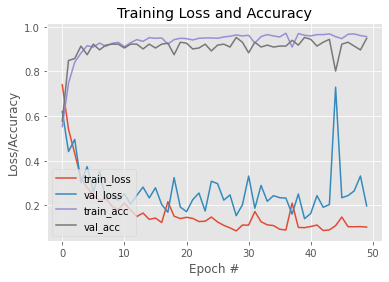

In [29]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(plot)

Result of the accuracy using categorical_crossentropy (loss)

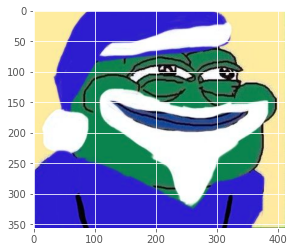

In [30]:
# load the image
image = cv2.imread("test_images/santa_pepe.jpg")
plt.imshow(image)
plt.show()
orig = image.copy()

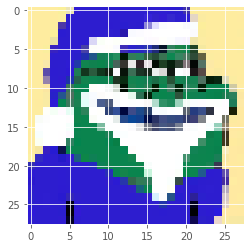

In [31]:
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
plt.imshow(image)
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [32]:
prob = model.predict(image)[0]
print(model.predict(image)[0]) 

[4.1192072e-03 1.5032385e-04 9.9573046e-01]


In [33]:
maximum_prob = np.amax(model.predict(image)[0]) 
predicted_class_number = np.where(prob == maximum_prob)[0][0]
predicted_class = labels_name[predicted_class_number]
print("The Prediction : " + predicted_class)

The Prediction : santa
